(717, 13) (717,)
(308, 13) (308,)
Highest accuracy: 0.9902597402597403 at k=1
Lowest accuracy: 0.5454545454545454 at k=207


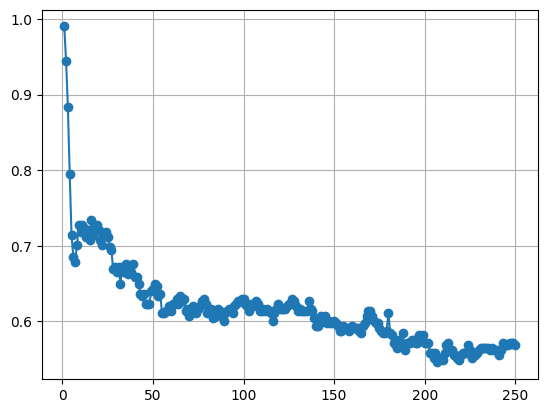

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
  

df = pd.read_csv("heart.csv")


# TASK 1
x = df.drop(columns=["target"]) # created new dataframe by dropping target
y = df["target"] # selects only target


# splitting datasets into train and test sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42)

print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

# accuracy storage
accuracies = {}

# test knn from k = 1 to 250
for k in range(1, 251):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xTrain, yTrain)
    accuracies[k] = knn.score(xTest, yTest)

max_k = max(accuracies, key=accuracies.get)
min_k = min(accuracies, key=accuracies.get)

print(f"Highest accuracy: {accuracies[max_k]} at k={max_k}")
print(f"Lowest accuracy: {accuracies[min_k]} at k={min_k}")


plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
plt.grid()
plt.show()

In [12]:
# TASK 2
seed_accuracies = {}

for seed in range(1, 11):
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=seed)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(xTrain, yTrain)
    seed_accuracies[seed] = knn.score(xTest, yTest)


max_seed = max(seed_accuracies, key=seed_accuracies.get)
min_seed = min(seed_accuracies, key=seed_accuracies.get)

# :.5f is used because it was showing so many values after points
print(f"Highest accuracy: {seed_accuracies[max_seed]:.5f} at random seed={max_seed}")
print(f"Lowest accuracy: {seed_accuracies[min_seed]:.5f} at random seed={min_seed}")

print("Accuracies for different seeds")
for seed, acc in seed_accuracies.items():
    print(f"seed: {seed}, Accurace test: {acc:.5f}")


Highest accuracy: 0.75325 at random seed=4
Lowest accuracy: 0.69481 at random seed=2
Accuracies for different seeds
seed: 1, Accurace test: 0.70779
seed: 2, Accurace test: 0.69481
seed: 3, Accurace test: 0.72727
seed: 4, Accurace test: 0.75325
seed: 5, Accurace test: 0.73377
seed: 6, Accurace test: 0.69805
seed: 7, Accurace test: 0.71429
seed: 8, Accurace test: 0.71753
seed: 9, Accurace test: 0.70779
seed: 10, Accurace test: 0.73052


     erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0       False    False             False    False               False   
1       False    False             False    False               False   
2       False    False             False    False               False   
3       False    False             False    False               False   
4       False    False             False    False               False   
..        ...      ...               ...      ...                 ...   
361     False    False             False    False               False   
362     False    False             False    False               False   
363     False    False             False    False               False   
364     False    False             False    False               False   
365     False    False             False    False               False   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                False               False         

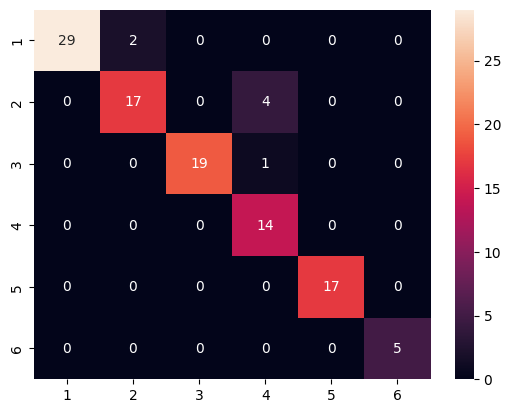

In [ ]:
# TASK 3
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("derm.csv")

# cleaning
print(df.isnull())
df = df.dropna()


x = df.drop(columns="class")
y = df["class"]

# Training and spliting
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.3, random_state=42)

# feature scaling
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

# applying knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xTrain, yTrain)

# evaluation using cross validation
cvScores = cross_val_score(knn, x, y, cv = 10)
print(f"cross validatoin: {cvScores}")
print(f"Average cross validation: {cvScores.mean()}")


# model evaluation (confusion matrix and classification report)
yPred = knn.predict(xTest)

conf_matrix = confusion_matrix(yTest, yPred)
print(f"Confusion Matrix: {conf_matrix}")
print(f"Classification Report: {classification_report(yTest, yPred)}")


sns.heatmap(conf_matrix, annot=True)